In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

## EDA

In [2]:
spain = pd.read_csv('spanish_wines.csv')

In [3]:
spain.head()

,Wine,Winery,Region,Sub Region,Year,Type,Grape,Alcohol,Review Score,Price
0,Pradorey Gran Reserva,Real Sitio de la Ventosilla (Pradorey),Castilla y León,Ribera del Duero,2009.0,Red,"Tempranillo (95%), Cabernet Sauvignon (3%), Me...",15.0,16.0,40.00
1,Guitián Fermentado en Barrica,Bodegas A Tapada,Galicia,Valdeorras,1998.0,White,Godello (100%),12.0,16.5,13.82
2,Raimat Cabernet Sauvignon El Molí,Raimat,Cataluña,Costers del Segre,1994.0,Red,Cabernet Sauvignon (100%),13.5,16.0,15.00
3,Valsacro Tinto Crianza,Bodegas Valsacro,La Rioja (España),Rioja,1997.0,Red,"Tempranillo (50%), Otras (40%), Mazuelo (10%)",13.0,14.5,18.00
4,Ruiz Villanueva Maceración Carbónica,Bodega Ecológica Bruno Ruiz,Castilla La Mancha,Otros Castilla La Mancha,1999.0,Red,Tempranillo (100%),12.0,12.5,4.50


In [4]:
spain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17842 entries, 0 to 17841
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Wine          17842 non-null  object 
 1   Winery        17796 non-null  object 
 2   Region        17811 non-null  object 
 3   Sub Region    17842 non-null  object 
 4   Year          17842 non-null  float64
 5   Type          17842 non-null  object 
 6   Grape         17842 non-null  object 
 7   Alcohol       17385 non-null  float64
 8   Review Score  17842 non-null  float64
 9   Price         17842 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.4+ MB


In [5]:
spain.describe()

,Year,Alcohol,Review Score,Price
count,17842.000000,17385.000000,17842.000000,17842.000000
mean,2007.034693,13.499960,13.840965,19.411194
std,6.009799,0.906035,1.799854,37.860300
min,1922.000000,4.000000,0.000000,1.100000
25%,2002.000000,13.000000,12.500000,7.200000
50%,2007.000000,13.500000,14.000000,12.000000
75%,2012.000000,14.000000,15.000000,21.000000
max,2019.000000,21.900000,19.500000,2400.000000


<AxesSubplot:>

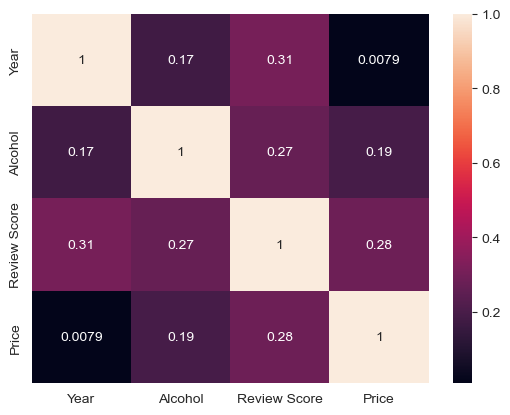

In [6]:
## Correlation between numerical values
sns.heatmap(spain.corr(), annot=True)

<AxesSubplot:xlabel='Year', ylabel='Price'>

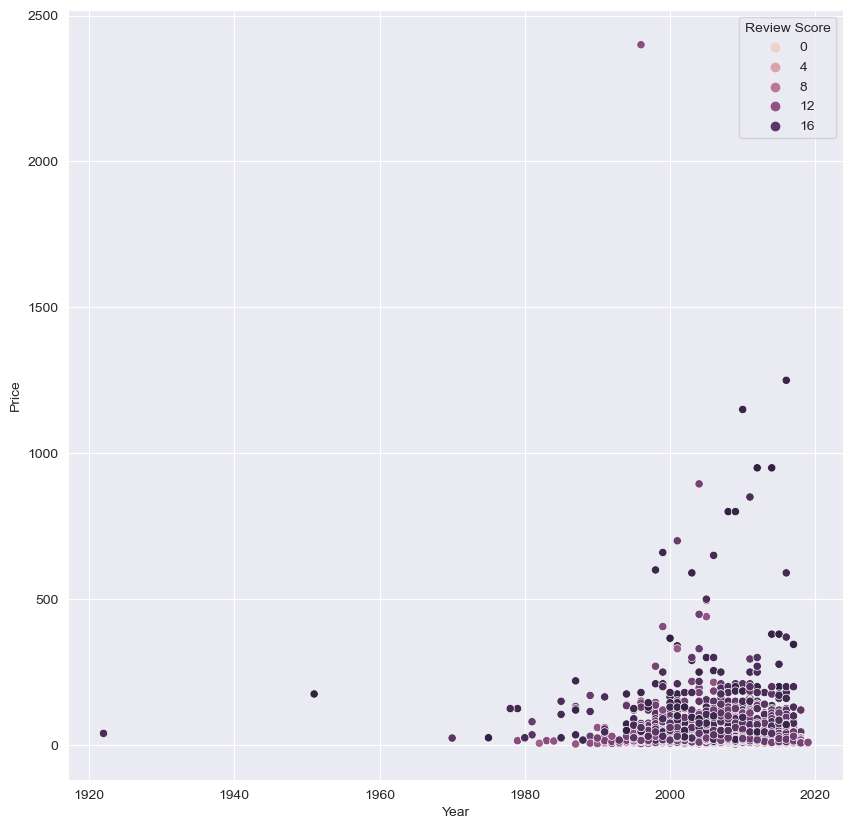

In [7]:
## How year and rating correlate with price:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=spain, x='Year', y='Price',hue='Review Score')

<AxesSubplot:xlabel='Year', ylabel='Price'>

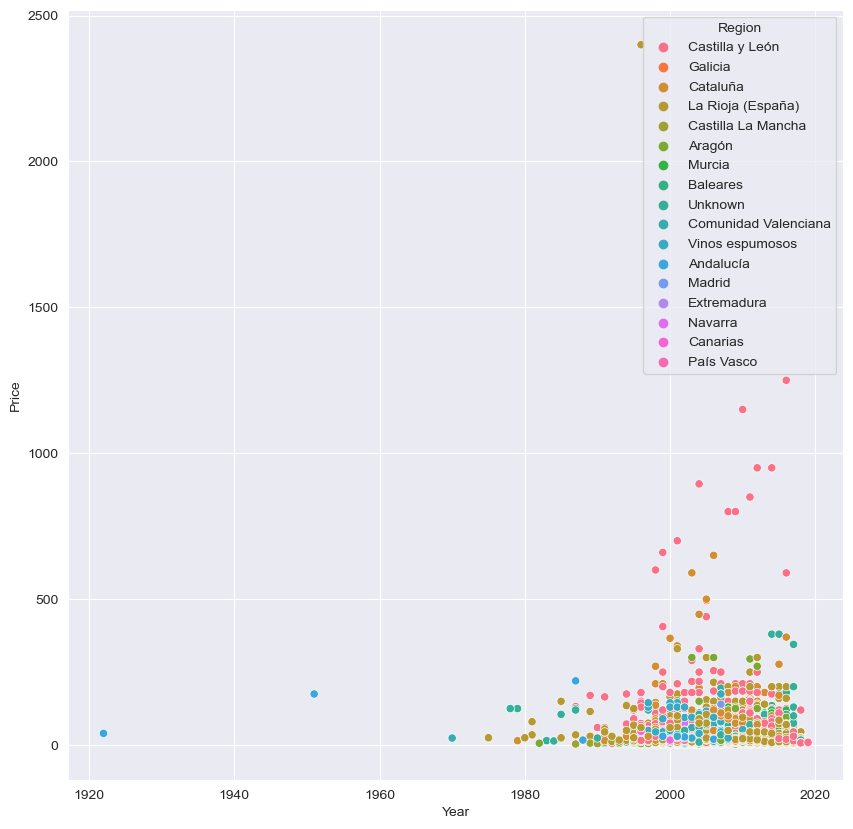

In [8]:
## Does the region correlate with year and price?
plt.figure(figsize=(10, 10))
sns.scatterplot(data=spain, x='Year', y='Price',hue='Region')

## Cleaning

### Dealing with Null Values

Text(0.5, 38.72222222222221, 'Missing Values')

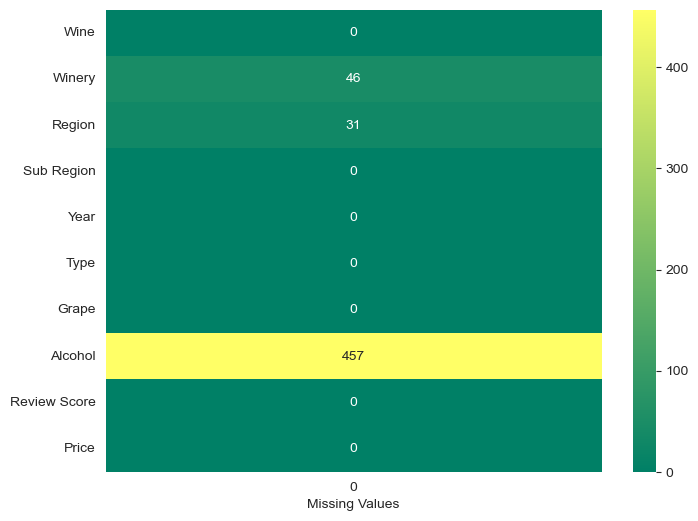

In [9]:
## Visualising null values
missing_values = spain.isna().sum().to_frame()

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(missing_values, annot=True, fmt='d', cmap='summer', ax=ax)

ax.set_xlabel('Missing Values')

In [10]:
## Percentage of NaN
spain.isna().mean()

Wine            0.000000
Winery          0.002578
Region          0.001737
Sub Region      0.000000
Year            0.000000
Type            0.000000
Grape           0.000000
Alcohol         0.025614
Review Score    0.000000
Price           0.000000
dtype: float64

In [11]:
## All missing values are less that 5%, considering the size of the dataset, I believe it's fair to just drop them
spain.dropna(inplace=True)

In [12]:
## Checking results
spain.isnull().values.any()

False

### Outlier Engineering

In [13]:
def diagnostic_plots(df, variable):

    plt.figure(figsize=(16, 4))

    ## Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    ## Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    ## Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

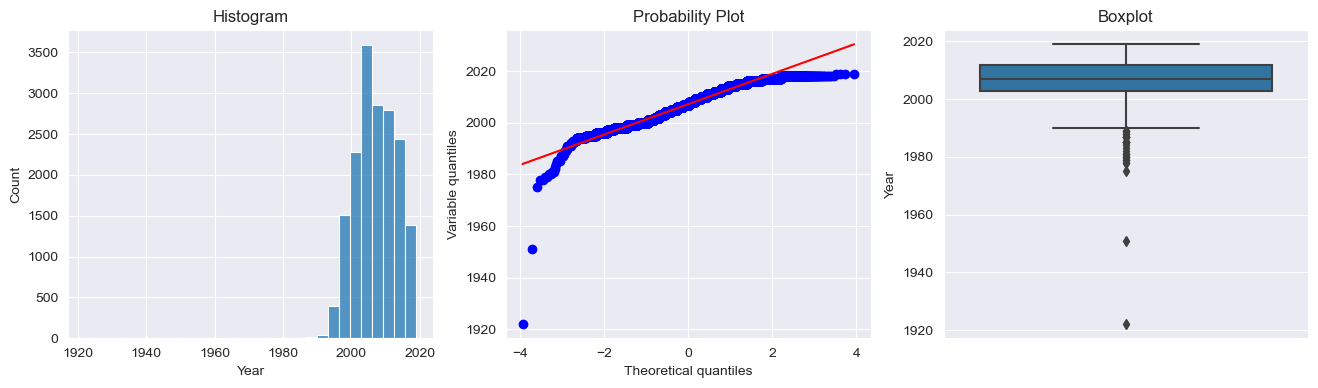

In [14]:
diagnostic_plots(spain,'Year')

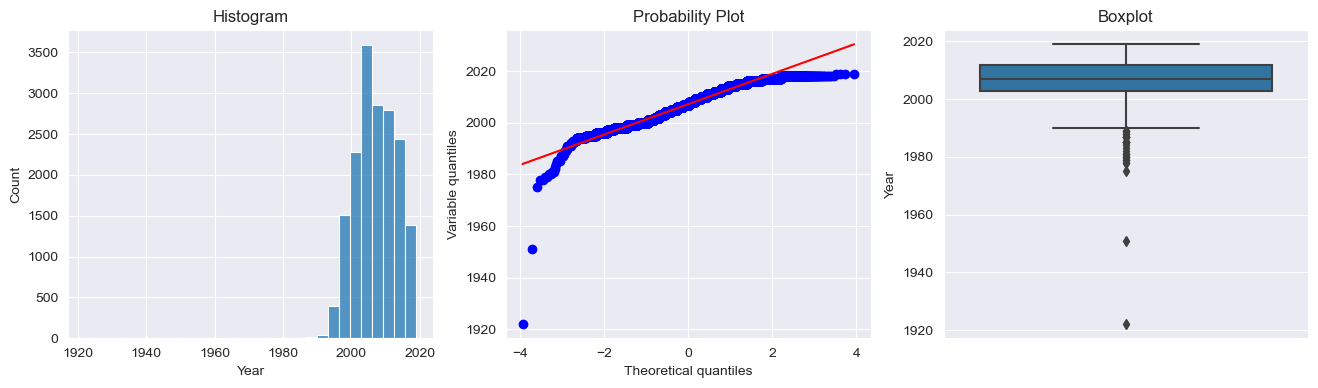

In [15]:
diagnostic_plots(spain,'Year')

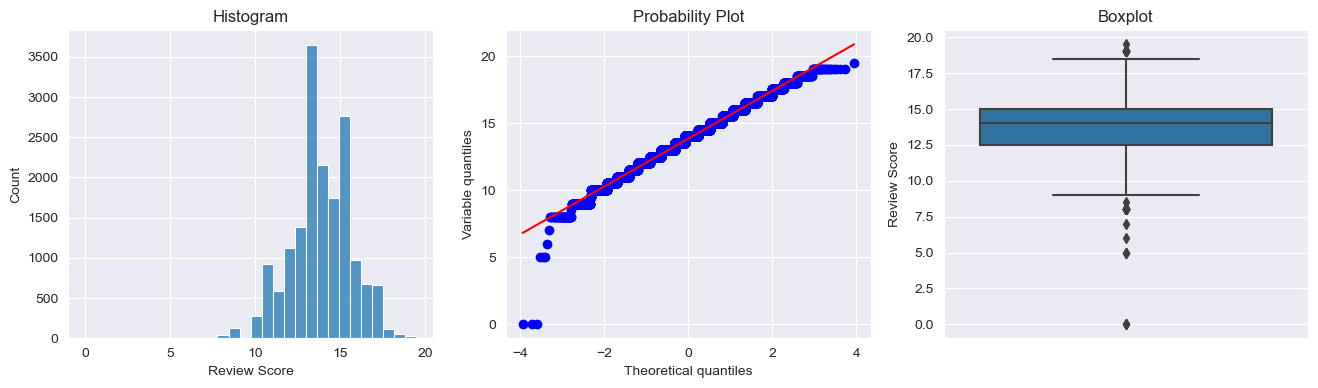

In [16]:
diagnostic_plots(spain,'Review Score')

In [17]:
def find_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [18]:
## Finding limits for Year
Year_upper_limit, Year_lower_limit = find_boundaries(spain, 'Year', 1.5)
Year_upper_limit, Year_lower_limit

(2025.5, 1989.5)

In [19]:
## Limits for Alcohol
Alcohol_upper_limit, Alcohol_lower_limit = find_boundaries(spain, 'Alcohol', 1.5)
Alcohol_upper_limit, Alcohol_lower_limit

(15.5, 11.5)

In [20]:
## Limits for Review Score
Review_upper_limit, Review_lower_limit = find_boundaries(spain, 'Review Score', 1.5)
Review_upper_limit, Review_lower_limit

(18.75, 8.75)

In [21]:
## Flagging outliers in the dataset
outliers_Year = np.where(spain['Year'] > Year_upper_limit, True,
                         np.where(spain['Year'] < Year_lower_limit, True, False))

outliers_Alcohol = np.where(spain['Alcohol'] > Alcohol_upper_limit, True,
                            np.where(spain['Alcohol'] < Alcohol_lower_limit, True, False))

outliers_Review = np.where(spain['Review Score'] > Review_upper_limit, True,
                           np.where(spain['Review Score'] < Review_lower_limit, True, False))

In [22]:
## Trimming the dataset
spain_trimmed = spain.loc[~(outliers_Year + outliers_Alcohol + outliers_Review)]

spain.shape, spain_trimmed.shape

((17315, 10), (17022, 10))

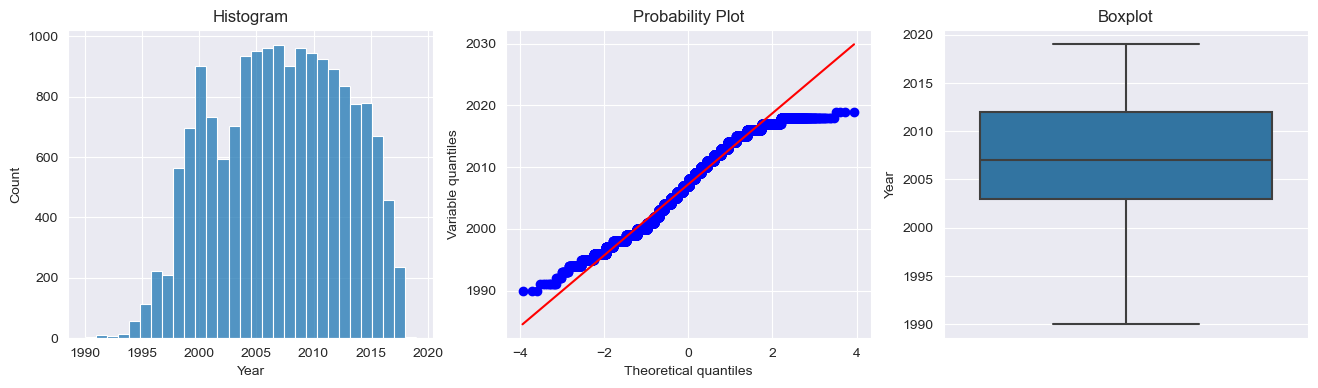

In [23]:
## Exploring outliers in the trimmed dataset
diagnostic_plots(spain_trimmed,'Year')

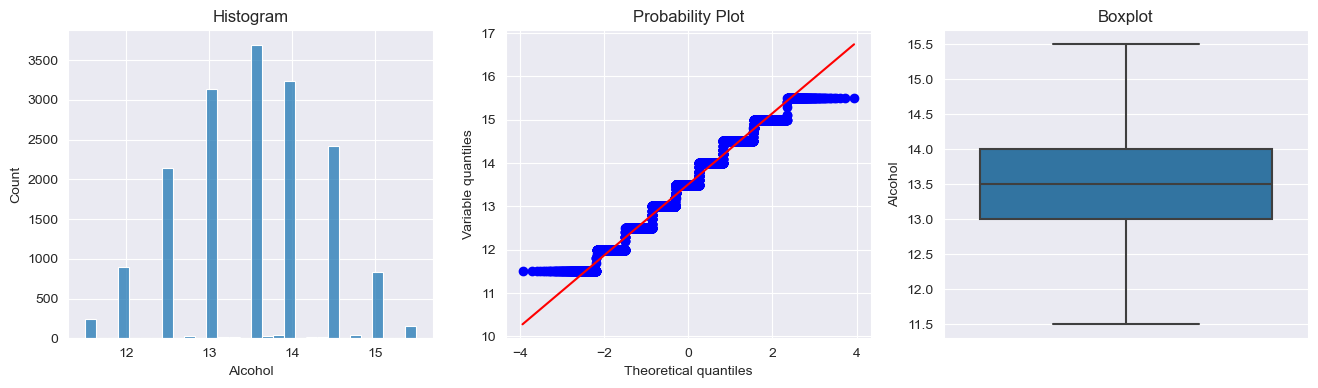

In [24]:
diagnostic_plots(spain_trimmed,'Alcohol')

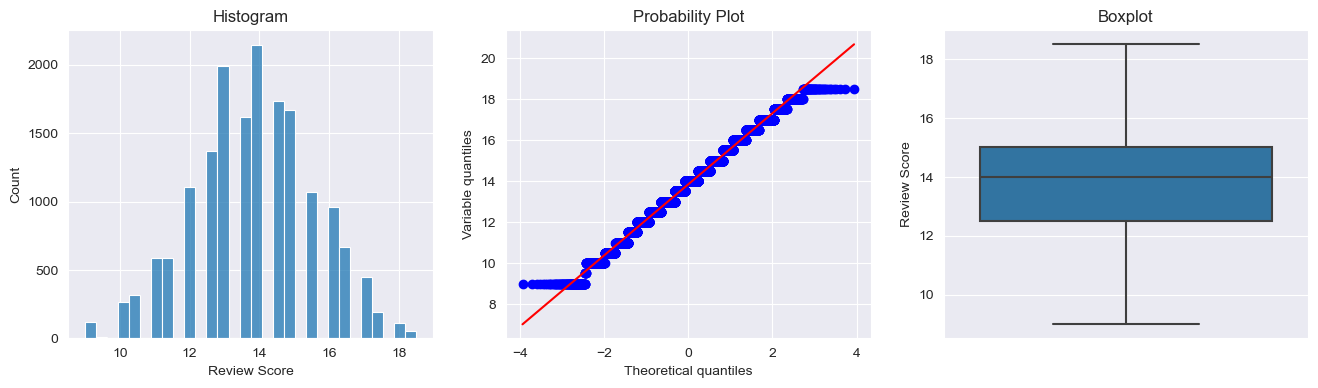

In [25]:
diagnostic_plots(spain_trimmed,'Review Score')

In [26]:
## Trimming will cause a loss of 1.69% of the dataset, considering the size of it, I'm deciding to go ahead and deal with the outliers this way
spain = spain_trimmed

In [27]:
spain.describe()

,Year,Alcohol,Review Score,Price
count,17022.000000,17022.000000,17022.000000,17022.000000
mean,2007.219011,13.508789,13.842557,18.790560
std,5.830899,0.834305,1.739414,34.932325
min,1990.000000,11.500000,9.000000,1.100000
25%,2003.000000,13.000000,12.500000,7.250000
50%,2007.000000,13.500000,14.000000,12.000000
75%,2012.000000,14.000000,15.000000,20.000000
max,2019.000000,15.500000,18.500000,2400.000000


Text(0, 0.5, 'Number of wines')

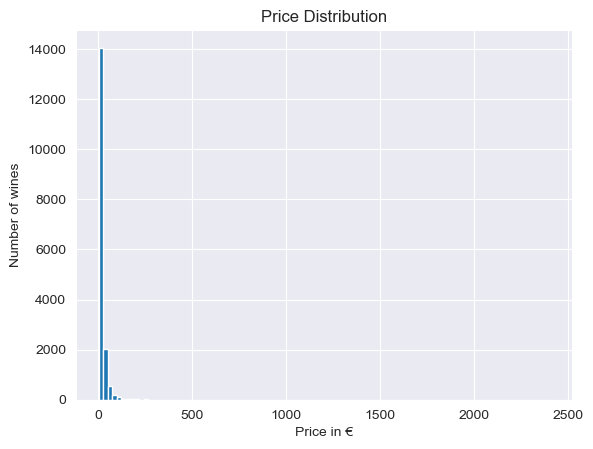

In [28]:
## I'm guessing Price has many outliers and the distribution is very skewed
fig = spain['Price'].hist(bins=100)

fig.set_title('Price Distribution')
fig.set_xlabel('Price in €')
fig.set_ylabel('Number of wines')

(0.0, 100.0)

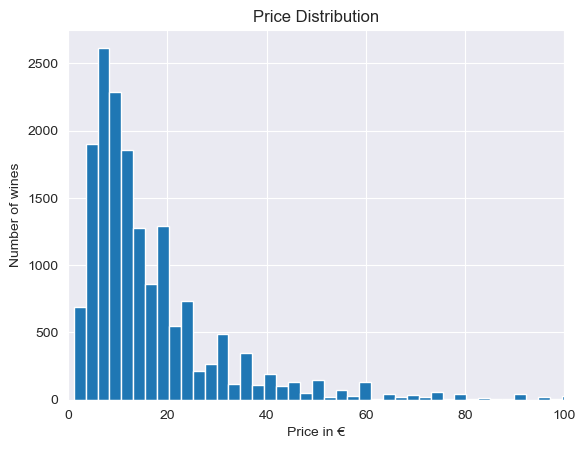

In [29]:
fig = spain['Price'].hist(bins=1000)

fig.set_title('Price Distribution')
fig.set_xlabel('Price in €')
fig.set_ylabel('Number of wines')

fig.set_xlim(0, 100)

In [30]:
## Checking how many wines with a price less than 100€ -vs- more than 100€
print(f'Wines that cost less than 100€: {len(spain[spain.Price <= 100])}')
print(f'Wines that cost more than 100€: {len(spain[spain.Price > 100])}')

Wines that cost less than 100€: 16819
Wines that cost more than 100€: 203


In [31]:
## 1.19% of the dataset will cause a massive outlier problem, therefore I'm deciding to sacrifice that bit and work on a model that's suitable for wines up to 100€
spain = spain[spain.Price <= 100].copy()
spain.reset_index(drop=True,inplace=True)

In [32]:
## Saving cleaned data
spain.to_csv('spanish_wines_cleaned.csv', index=False)